# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

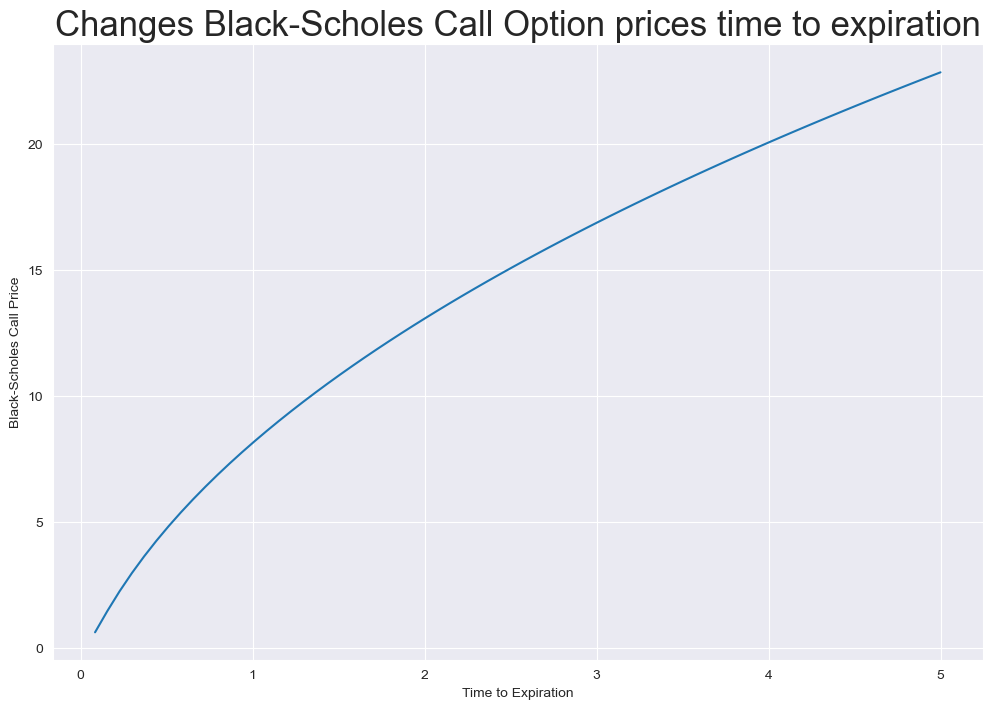

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

In [17]:
#Given parameters:
K     = 110
sigma = 0.3
r     = 0

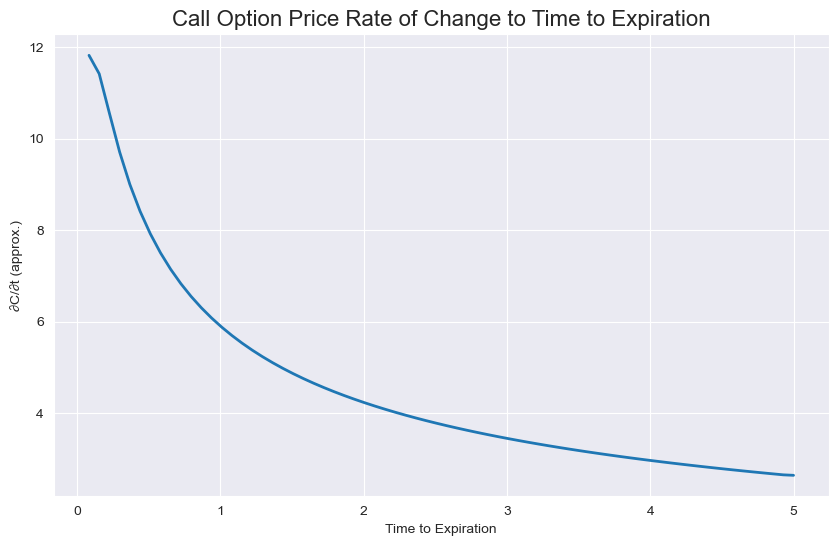

In [18]:
#a) Rate of change of call price w.r.t. time
S0 = 100
times = np.linspace(1/12, 5, 70)
call_prices = np.array([bs_call(S0, K, sigma, t, r) for t in times])

#approximate dC/dt
dC_dt = np.gradient(call_prices, times)

plt.figure(figsize=(10,6))
plt.plot(times, dC_dt, lw=2)
plt.title('Call Option Price Rate of Change to Time to Expiration', fontsize=16)
plt.xlabel('Time to Expiration')
plt.ylabel('∂C/∂t (approx.)')
plt.show()

Interpretation:

1. It is always positive. Since an option with more time left always has greater time value, the slope ∂C/∂t stays above zero.

2. It turns very steep when time is short. Near the expiration, even a small increase in time pushes the price up a lot. That is because each extra time is very valuable right before the expiration.

3. It flattens when the remaining time is long. If there are several years left, adding another year (or half-year) barely moves the price. With plenty of time already, the marginal benefit of more time is much smaller.


/var/folders/dv/xq3vbg2x22zfk35z4q64z0br0000gn/T/ipykernel_67900/2954487562.py:24: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


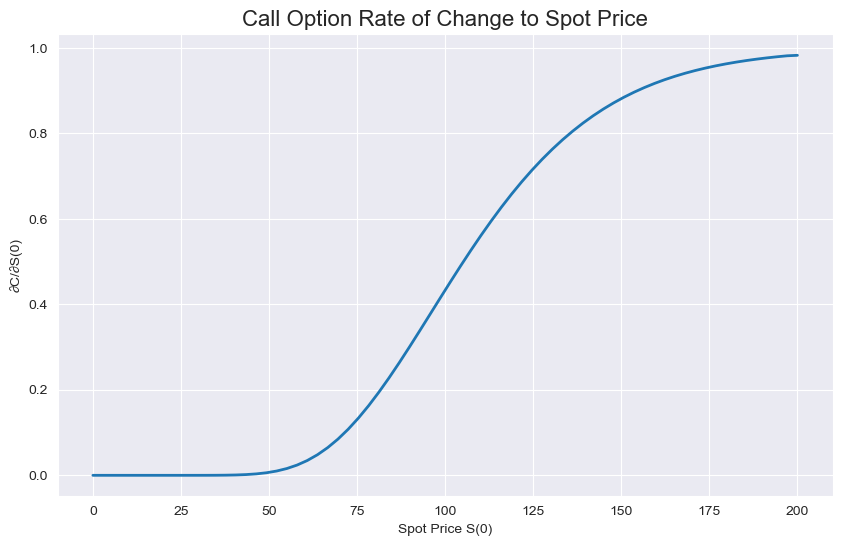

In [19]:
#b) Rate of change of call price w.r.t. spot price
#Fix a year for observation, range from 0 to 200
t  = 1
S_0 = np.linspace(0, 200, 70)

call_prices = np.array([bs_call(S,K,sigma,t,r) for S in S_0])

#approximate dC/dS_0
dC_dS_0 = np.gradient(call_prices, S_0)

plt.figure(figsize=(10,6))
plt.plot(S_0, dC_dS_0, lw=2)
plt.title('Call Option Rate of Change to Spot Price', fontsize=16)
plt.xlabel('Spot Price S(0)')
plt.ylabel('∂C/∂S(0)')
plt.show()


Interpretation: Recall that $$
\Delta(C(0)) := \frac{\partial C(0)}{\partial S(0)} = \Phi(d_1).
$$ where $$
d_1 = \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}
$$

1. When it is deeply out-of-the-money, i.e. strike price is much greater than the spot price, the option price barely moves when spot moves. Because the spot price is too far below the strike price, so the call has almost no trading value, so it is almost insensitive to the spot price. In this case, $\ln \left(\frac{S(0)}{K}\right)$ is very negative, so delta, $\Phi(d_1)$, is very close to 0.


2. When the strike price is closer to the spot price, delta changes most drastically, any changes of the spot price can effect the trading value of the strike price, so the sensitivity of the option price changes most drastically. In this case, $S$ is very close to $e^{-rt}$, so $d_1$ is very close 0, so delta, $\Phi(d_1)$, is close to $\Phi(0)$ roughly 0.5. It is the steepest point of $\Phi$ as well. 


3. When it is deeply in-the-money, i.e. strike price is much less than the spot price, the option price moves accordingly when spot moves since delta is almost 1. Because trader can make money right of way, so the option price moves almost one-for-one with the spot price.  In this case, $\ln \left(\frac{S(0)}{K}\right)$ is very positive, so delta, $\Phi(d_1)$, is very close to 1.


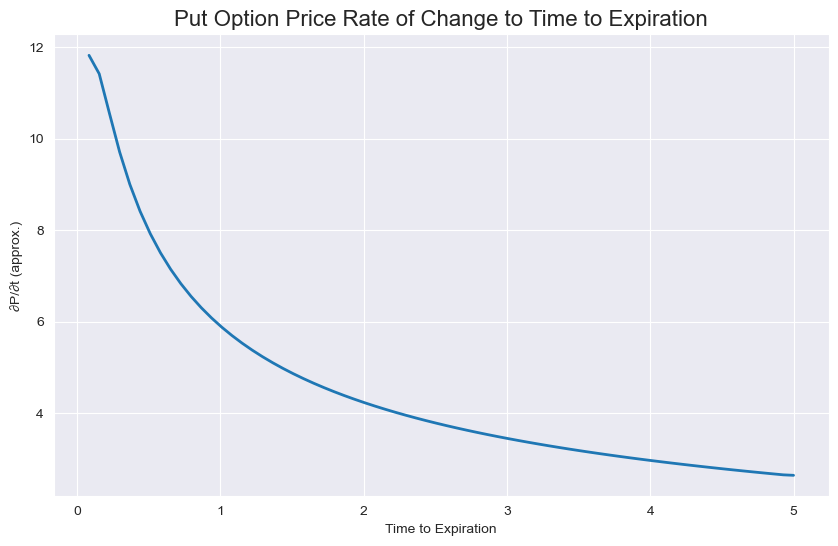

In [22]:
#c) Repeat for put options: Rate of change of put price w.r.t. time
put_prices = np.array([bs_put(S0, K, sigma, t, r) for t in times])
dP_dt = np.gradient(put_prices, times)

plt.figure(figsize=(10,6))
plt.plot(times, dP_dt, lw=2)
plt.title('Put Option Price Rate of Change to Time to Expiration', fontsize=16)
plt.xlabel('Time to Expiration')
plt.ylabel('∂P/∂t (approx.)')
plt.show()


Interpretation:

This looks identical to the previous graph, rate of change of call price in terms of $t$. The definition of $C(t)$ and $P(t)$ are symmetric, so their partial derivatives with repsect to remaining time are identical. 

So the takeaway is identical: the slope is very steep when there is little time left, and it gradually flattens out as the remaining time grows.

/var/folders/dv/xq3vbg2x22zfk35z4q64z0br0000gn/T/ipykernel_67900/2954487562.py:47: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


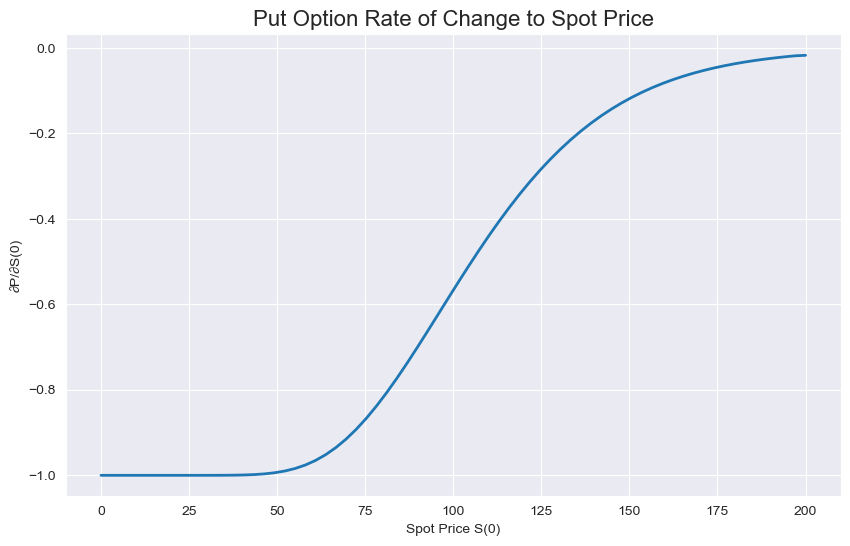

In [24]:
# Rate of change of put price w.r.t. spot price
put_S = np.array([bs_put(S, K, sigma, t, r) for S in S_range])
dP_dS = np.gradient(put_S, S_range)

plt.figure(figsize=(10,6))
plt.plot(S_range, dP_dS, lw=2)
plt.title('Put Option Rate of Change to Spot Price', fontsize=16)
plt.xlabel('Spot Price S(0)')
plt.ylabel('∂P/∂S(0)')
plt.show()

Interpretation:

This looks identical to the counterpart of call option, but the range is flipped from -1 to 0. By the put-call parity, it follows that $$
\Delta(P(0)) = \frac{\partial C(0)}{\partial S(0)} - 1 = \Phi(d_1) -1.
$$

1. When it is deeply out-of-the-money, i.e. strike price is much less than the spot price, the option price barely moves when spot moves. Because the put has almost no trading value, so it is almost insensitive to the spot price. In this case, $\ln \left(\frac{S(0)}{K}\right)$ is very positive, so delta, $\Phi(d_1)-1$, is very close to 0.


2. When the strike price is closer to the spot price, delta changes most drastically, any changes of the spot price can effect the trading value of the strike price, so the sensitivity of the option price changes most drastically. In this case, $S$ is very close to $e^{-rt}$, so $d_1$ is very close 0, so delta, $\Phi(d_1)-1$, is close to $\Phi(0)-1$ roughly $-0.5$. 


3. When it is deeply in-the-money, i.e. strike price is much greater than the spot price, the option price moves accordingly when spot moves since delta is almost -1. Because trader can make money right of way, so the option price moves almost one-for-one with the spot price.  In this case, $\ln \left(\frac{S(0)}{K}\right)$ is very negative, so delta, $\Phi(d_1)-1$, is very close to $-1$.

